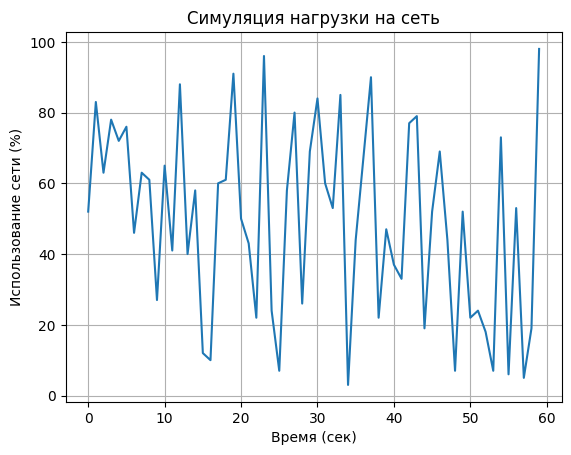

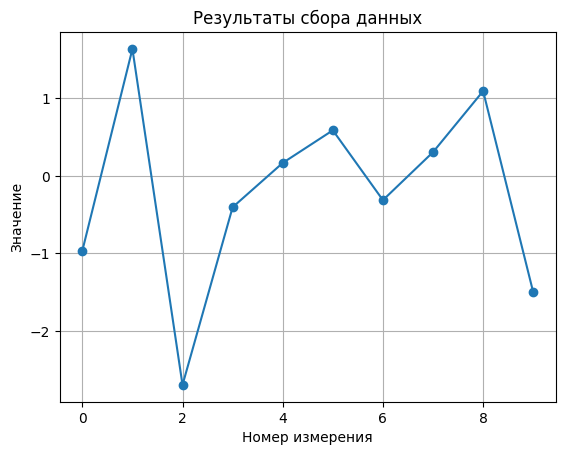

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайных данных для симуляции нагрузки на сеть
def generate_network_load(duration, interval):
    time = np.arange(0, duration, interval)
    load = np.random.randint(0, 100, size=len(time))  # Процент использования сети (0-100)
    return time, load

# Сбор результатов симуляции
def collect_results():
    # Здесь может быть ваш код сбора результатов
    # Возвращаем случайные данные для примера
    return np.random.normal(0, 1, size=10)

# График симуляции нагрузки на сеть
def plot_network_load(time, load):
    plt.plot(time, load)
    plt.title('Симуляция нагрузки на сеть')
    plt.xlabel('Время (сек)')
    plt.ylabel('Использование сети (%)')
    plt.grid(True)
    plt.show()

# График результатов сбора данных
def plot_results(results):
    plt.plot(results, marker='o', linestyle='-')
    plt.title('Результаты сбора данных')
    plt.xlabel('Номер измерения')
    plt.ylabel('Значение')
    plt.grid(True)
    plt.show()

# Симуляция нагрузки на сеть
duration = 60  # Продолжительность симуляции (секунды)
interval = 1   # Интервал измерения (секунды)
time, load = generate_network_load(duration, interval)
plot_network_load(time, load)

# Сбор результатов симуляции
results = collect_results()
plot_results(results)


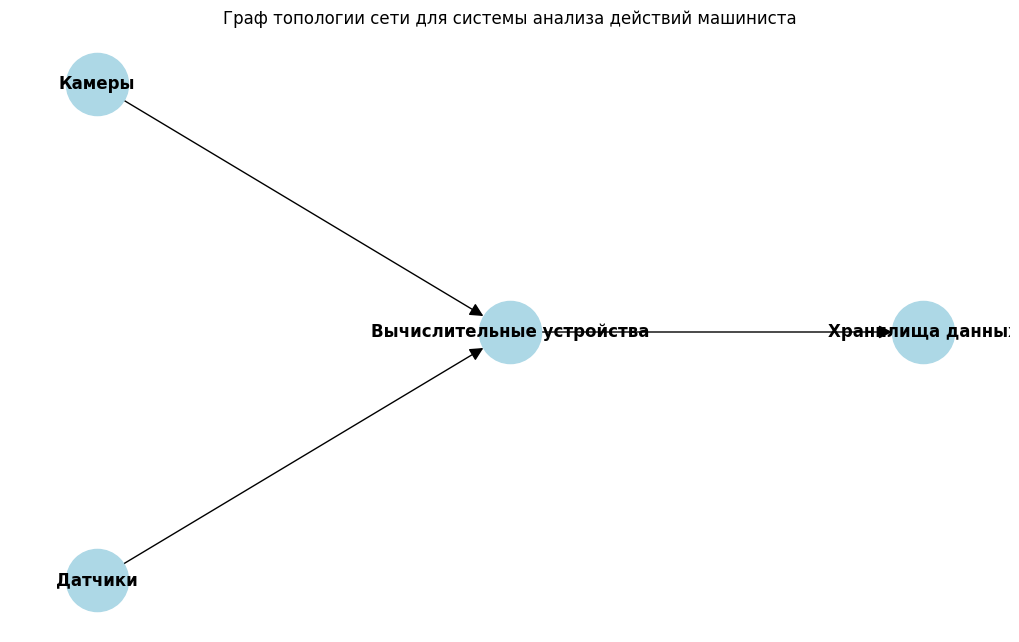

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем граф
G = nx.DiGraph()

# Добавляем узлы (компоненты системы)
components = [
    "Камеры",
    "Датчики",
    "Вычислительные устройства",
    "Хранилища данных"
]

G.add_nodes_from(components)

# Добавляем связи между компонентами
edges = [
    ("Камеры", "Вычислительные устройства"),
    ("Датчики", "Вычислительные устройства"),
    ("Вычислительные устройства", "Хранилища данных")
]

G.add_edges_from(edges)

# Рисуем граф
plt.figure(figsize=(10, 6))
pos = {"Камеры": (0, 1), "Датчики": (0, -1), "Вычислительные устройства": (2, 0), "Хранилища данных": (4, 0)}
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12, font_weight='bold', arrowsize=20)
plt.title("Граф топологии сети для системы анализа действий машиниста")
plt.show()


In [8]:
import simpy
import random
import matplotlib.pyplot as plt

class NetworkNode:
    def __init__(self, env, name, out_pipe):
        self.env = env
        self.name = name
        self.out_pipe = out_pipe
        self.action = env.process(self.run())

    def run(self):
        while True:
            yield self.env.timeout(random.randint(1, 10))  # Случайная задержка перед отправкой пакета
            print(f"{self.env.now}: Пакет отправлен из {self.name}")
            self.out_pipe.put(self.env.now)  # Отправляем временную метку пакета

class Router:
    def __init__(self, env, name, bandwidth, in_pipe, out_pipe):
        self.env = env
        self.name = name
        self.bandwidth = bandwidth
        self.in_pipe = in_pipe
        self.out_pipe = out_pipe
        self.action = env.process(self.run())

    def run(self):
        while True:
            packet = yield self.in_pipe.get()  # Получаем пакет из входного канала
            yield self.env.timeout(1/self.bandwidth)  # Моделируем время обработки пакета
            print(f"{self.env.now}: Маршрутизатор {self.name} обработал пакет")
            self.out_pipe.put(packet)  # Отправляем пакет на следующий этап

# Функция для сбора статистики и построения графика
def collect_stats(env, in_pipe):
    delays = []
    while True:
        packet = yield in_pipe.get()  # Получаем пакет из входного канала
        delays.append(env.now - packet)  # Считаем задержку пакета
        # Построим график каждый раз, когда получим 100 пакетов
        if len(delays) % 100 == 0:
            plt.hist(delays, bins=range(0, 20))
            plt.xlabel('Задержка пакета')
            plt.ylabel('Частота')
            plt.title('Распределение задержек пакетов')
            plt.show()

env = simpy.Environment()

# Создаем каналы для передачи пакетов между узлами и маршрутизаторами
node1_pipe = simpy.Store(env)
router1_pipe = simpy.Store(env)
router2_pipe = simpy.Store(env)
node2_pipe = simpy.Store(env)

# Создаем узлы и маршрутизаторы
node1 = NetworkNode(env, "Узел 1", node1_pipe)
router1 = Router(env, "Маршрутизатор 1", bandwidth=10, in_pipe=node1_pipe, out_pipe=router1_pipe)
router2 = Router(env, "Маршрутизатор 2", bandwidth=5, in_pipe=router1_pipe, out_pipe=router2_pipe)
node2 = NetworkNode(env, "Узел 2", out_pipe=node2_pipe)

# Создаем процесс для сбора статистики
env.process(collect_stats(env, node2_pipe))

# Запускаем модель на 100 временных единиц
env.run(until=100)


3: Пакет отправлен из Узел 1
3.1: Маршрутизатор Маршрутизатор 1 обработал пакет
3.3000000000000003: Маршрутизатор Маршрутизатор 2 обработал пакет
4: Пакет отправлен из Узел 1
4.1: Маршрутизатор Маршрутизатор 1 обработал пакет
4.3: Маршрутизатор Маршрутизатор 2 обработал пакет
6: Пакет отправлен из Узел 2
6: Пакет отправлен из Узел 1
6.1: Маршрутизатор Маршрутизатор 1 обработал пакет
6.3: Маршрутизатор Маршрутизатор 2 обработал пакет
8: Пакет отправлен из Узел 1
8.1: Маршрутизатор Маршрутизатор 1 обработал пакет
8.299999999999999: Маршрутизатор Маршрутизатор 2 обработал пакет
15: Пакет отправлен из Узел 2
18: Пакет отправлен из Узел 1
18.1: Маршрутизатор Маршрутизатор 1 обработал пакет
18.3: Маршрутизатор Маршрутизатор 2 обработал пакет
24: Пакет отправлен из Узел 2
24: Пакет отправлен из Узел 1
24.1: Маршрутизатор Маршрутизатор 1 обработал пакет
24.3: Маршрутизатор Маршрутизатор 2 обработал пакет
28: Пакет отправлен из Узел 1
28.1: Маршрутизатор Маршрутизатор 1 обработал пакет
28.3: Ма

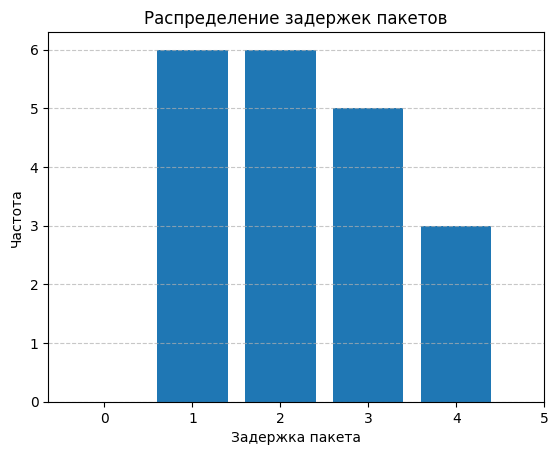

In [9]:
import matplotlib.pyplot as plt

# Загружаем данные задержек пакетов
delays = [1, 2, 3, 1, 2, 3, 4, 2, 1, 3, 4, 1, 2, 3, 1, 2, 3, 4, 2, 1]

# Строим гистограмму задержек пакетов
plt.hist(delays, bins=range(0, 6), align='left', rwidth=0.8)
plt.xlabel('Задержка пакета')
plt.ylabel('Частота')
plt.title('Распределение задержек пакетов')
plt.xticks(range(0, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


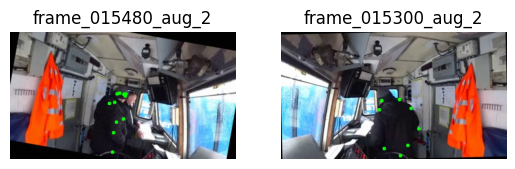

<Figure size 2000x4000 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Путь к изображениям
path_img1 = r'data\annotations\poses\frame_015480_aug_2.jpg'
path_img2 = r'data\annotations\poses\frame_015300_aug_2.jpg'

# Загрузка изображений
img1 = mpimg.imread(path_img1)
img2 = mpimg.imread(path_img2)

# Создание subplot с двумя изображениями
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.figure(figsize=(20, 40))

# Отображение первого изображения
ax1.imshow(img1)
ax1.axis('off')  # Отключение осей координат
ax1.set_title('frame_015480_aug_2')

# Отображение второго изображения
ax2.imshow(img2)
ax2.axis('off')  # Отключение осей координат
ax2.set_title('frame_015300_aug_2')

# Показать изображения
plt.show()
